#🛠️ Preparación de los Datos




##Extración del Archivo Tratado y Preparación

---



In [130]:

import  pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,cross_validate, GridSearchCV
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,RocCurveDisplay
from imblearn.pipeline import Pipeline as imbpipeline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


datos = pd.read_csv('/content/drive/MyDrive/Data Science ALURA/datos_tratados.csv')


In [131]:
# Ver las primeras filas del dataset
datos.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
0,Female,0,Yes,Yes,9,0002-ORFBO,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,Male,0,No,No,9,0003-MKNFE,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,Male,0,No,No,4,0004-TLHLJ,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,Male,1,Yes,No,13,0011-IGKFF,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,Female,1,Yes,No,3,0013-EXCHZ,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes


In [132]:
# Información general del DataFrame (tipos de datos, nulos, memoria)
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   customerID        7032 non-null   object 
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [133]:
# Descripción estadística de variables numéricas
datos.describe()


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [134]:
# Descripción estadística de variables categóricas
datos.describe(include='object')

,gender,Partner,Dependents,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,7032,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,9995-HOTOH,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,1,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [135]:
# Valores únicos por cada columna categórica
for column in datos.columns:
  print(f"Unique values for column '{column}':")
  print(datos[column].unique())
  print("-" * 30)



Unique values for column 'gender':
['Female' 'Male']
------------------------------
Unique values for column 'SeniorCitizen':
[0 1]
------------------------------
Unique values for column 'Partner':
['Yes' 'No']
------------------------------
Unique values for column 'Dependents':
['Yes' 'No']
------------------------------
Unique values for column 'tenure':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
------------------------------
Unique values for column 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Unique values for column 'PhoneService':
['Yes' 'No']
------------------------------
Unique values for column 'MultipleLines':
['No' 'Yes' 'No phone service']
------------------------------
Unique values for column 'InternetService':

In [136]:
# Distribución de la variable objetivo (Churn)
datos['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.734215
Yes,0.265785


In [137]:
# Distribución de los contratos de los clientes
datos['Contract'].value_counts(normalize=True)

,proportion
Contract,
Month-to-month,0.551052
Two year,0.239619
One year,0.209329


In [138]:
# Edad de los clientes (SeniorCitizen) - proporción
datos['SeniorCitizen'].value_counts(normalize=True)

,proportion
SeniorCitizen,
0,0.8376
1,0.1624


In [139]:
# Correlación entre variables numéricas
datos.corr(numeric_only=True)

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
Charges.Monthly,0.219874,0.246862,1.000000,0.651065
Charges.Total,0.102411,0.825880,0.651065,1.000000


In [140]:
datos['gender']=datos['gender'].replace({'Female':0,'Male':1})

In [141]:
# Convertir columnas seleccionadas a binario
cols_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',]

for col in cols_binarias:
    datos[col] = datos[col].map({'Yes': 1, 'No': 0})


In [142]:
cols_binarias_1 = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_binarias_1:
    datos[col]=datos[col].replace({'No':0,'Yes':1, 'No internet service':0, 'No phone service':0})

In [143]:
# Valores únicos por cada columna categórica
for column in datos.columns:
  print(f"Unique values for column '{column}':")
  print(datos[column].unique())
  print("-" * 30)


Unique values for column 'gender':
[0 1]
------------------------------
Unique values for column 'SeniorCitizen':
[0 1]
------------------------------
Unique values for column 'Partner':
[1 0]
------------------------------
Unique values for column 'Dependents':
[1 0]
------------------------------
Unique values for column 'tenure':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
------------------------------
Unique values for column 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Unique values for column 'PhoneService':
[1 0]
------------------------------
Unique values for column 'MultipleLines':
[0 1]
------------------------------
Unique values for column 'InternetService':
['DSL' 'Fiber optic' 'No']
------------------------------


In [144]:
datos['DeviceProtection'].value_counts()

,count
DeviceProtection,
0,4614
1,2418


##Eliminación de Columnas Irrelevantes

---



In [145]:
# Eliminar la columna customerID
datos = datos.drop(columns=['customerID'])


In [146]:
datos

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
0,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30,0
1,1,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,0
2,1,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,1
3,1,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,1
4,0,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90,0
7028,1,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,1
7029,1,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,0
7030,1,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,0


In [147]:
col_no = ['tenure','Charges.Monthly	','Charges.Total']

##ENCODING

---



In [148]:


# Columnas categóricas a transformar
cols_categoricas = ['InternetService', 'Contract', 'PaymentMethod']

# Columnas que NO deben ser transformadas (se quedan igual)
col_no = ['tenure','Charges.Monthly','Charges.Total']

# Definir el transformador
one_hot_enc = make_column_transformer(
    (OneHotEncoder(drop=None, handle_unknown='ignore'), cols_categoricas),
    remainder='passthrough',     # deja el resto de columnas como están (incluidas las binarias y col_no)
    sparse_threshold=0           # devuelve DataFrame en formato denso
)

# Aplicar el transformador
datos_encoded = one_hot_enc.fit_transform(datos)

# Crear nuevo DataFrame con nombres de columnas correctos
datos_encoded = pd.DataFrame(
    datos_encoded,
    columns=one_hot_enc.get_feature_names_out()
)

# Verificar las primeras filas
datos_encoded.head()


,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,...,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Churn
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.6,593.30,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.9,542.40,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.9,280.85,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.0,1237.85,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.9,267.40,1.0


In [149]:
datos_encoded.columns

Index(['onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check', 'remainder__gender',
       'remainder__SeniorCitizen', 'remainder__Partner',
       'remainder__Dependents', 'remainder__tenure', 'remainder__PhoneService',
       'remainder__MultipleLines', 'remainder__OnlineSecurity',
       'remainder__OnlineBackup', 'remainder__DeviceProtection',
       'remainder__TechSupport', 'remainder__StreamingTV',
       'remainder__StreamingMovies', 'remainder__PaperlessBilling',
       'remainder__Charges.Monthly', 'remainder__Charges.Total',
       'remaind

In [150]:
# Diccionario de renombrado a español
nombres_columnas = {
    # Variables dummy de Internet
    'onehotencoder__InternetService_DSL': 'Internet_DSL',
    'onehotencoder__InternetService_Fiber optic': 'Internet_Fibra_Optica',
    'onehotencoder__InternetService_No': 'Internet_Sin_Servicio',

    # Variables dummy de Contrato
    'onehotencoder__Contract_Month-to-month': 'Contrato_Mensual',
    'onehotencoder__Contract_One year': 'Contrato_1_Ano',
    'onehotencoder__Contract_Two year': 'Contrato_2_Anos',

    # Variables dummy de Método de Pago
    'onehotencoder__PaymentMethod_Bank transfer (automatic)': 'Pago_Transferencia_Bancaria',
    'onehotencoder__PaymentMethod_Credit card (automatic)': 'Pago_Tarjeta_Credito',
    'onehotencoder__PaymentMethod_Electronic check': 'Pago_Cheque_Electronico',
    'onehotencoder__PaymentMethod_Mailed check': 'Pago_Cheque_Fisico',

    # Variables originales
    'remainder__gender': 'Genero',
    'remainder__SeniorCitizen': 'Adulto_Mayor',
    'remainder__Partner': 'Pareja',
    'remainder__Dependents': 'Dependientes',
    'remainder__tenure': 'Meses_Contrato',
    'remainder__PhoneService': 'Servicio_Telefonico',
    'remainder__MultipleLines': 'Multiples_Lineas',
    'remainder__OnlineSecurity': 'Seguridad_Online',
    'remainder__OnlineBackup': 'Backup_Online',
    'remainder__DeviceProtection': 'Proteccion_Dispositivo',
    'remainder__TechSupport': 'Soporte_Tecnico',
    'remainder__StreamingTV': 'Streaming_TV',
    'remainder__StreamingMovies': 'Streaming_Peliculas',
    'remainder__PaperlessBilling': 'Facturacion_Electronica',
    'remainder__Charges.Monthly': 'Cobro_Mensual',
    'remainder__Charges.Total': 'Cobro_Total',
    'remainder__Churn': 'Fuga'
}

# Aplicar el renombrado
datos_encoded.rename(columns=nombres_columnas, inplace=True)

# Revisar las nuevas columnas
print(datos.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Churn'],
      dtype='object')


In [151]:
datos = datos_encoded
datos

,Internet_DSL,Internet_Fibra_Optica,Internet_Sin_Servicio,Contrato_Mensual,Contrato_1_Ano,Contrato_2_Anos,Pago_Transferencia_Bancaria,Pago_Tarjeta_Credito,Pago_Cheque_Electronico,Pago_Cheque_Fisico,...,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Facturacion_Electronica,Cobro_Mensual,Cobro_Total,Fuga
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,0.0
7028,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,1.0
7029,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,0.0
7030,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,0.0


##Estandarizacion de los datos

---



In [152]:
# Columnas a escalar
cols_escalar = ['Meses_Contrato', 'Cobro_Mensual', 'Cobro_Total']

# Inicializar escalador
scaler = MinMaxScaler()

# Ajustar y transformar
datos[cols_escalar] = scaler.fit_transform(datos[cols_escalar])

# Verificar los primeros valores escalados
datos[cols_escalar].head()


,Meses_Contrato,Cobro_Mensual,Cobro_Total
0,0.112676,0.471144,0.066294
1,0.112676,0.414428,0.060420
2,0.042254,0.553731,0.030239
3,0.169014,0.793532,0.140670
4,0.028169,0.653234,0.028687


##Verificación de la Distribucion de la Variable Fuga

---



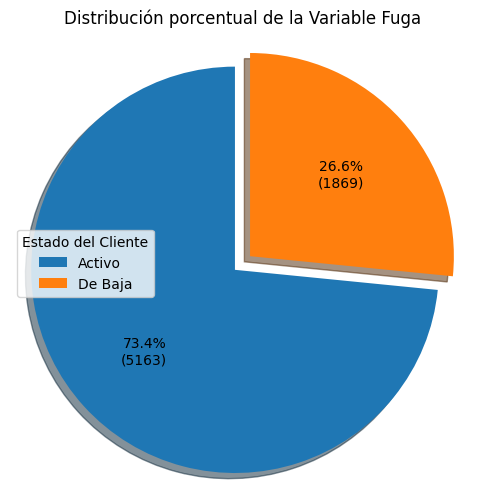


Análisis: Se observa un desbalance entre las clases de 'Fuga'.
La clase minoritaria representa menos del 40% del total.
Será recomendable aplicar algún método de balanceo como SMOTE o undersampling para los modelos predictivos.


In [153]:
fig, ax = plt.subplots(figsize=(6,6))

sizes = datos['Fuga'].value_counts(normalize=True)
explode = (0.1, 0)
counts = datos['Fuga'].value_counts()

def autopct_format(pct):
    total = sum(counts)
    val = int(round(pct*total/100.0))
    return '{:.1f}%\n({:d})'.format(pct, val)

ax.pie(sizes, explode=explode, autopct=autopct_format,
        shadow=True, startangle=90)
ax.axis('equal')

ax.legend(title='Estado del Cliente',labels=['Activo','De Baja'])
ax.set_title('Distribución porcentual de la Variable Fuga')
plt.show()
print("\nAnálisis: Se observa un desbalance entre las clases de 'Fuga'.")
print("La clase minoritaria representa menos del 40% del total.")
print("Será recomendable aplicar algún método de balanceo como SMOTE o undersampling para los modelos predictivos.")

##Balanceo de Clases: Aplicando Método "SMOTE"

---



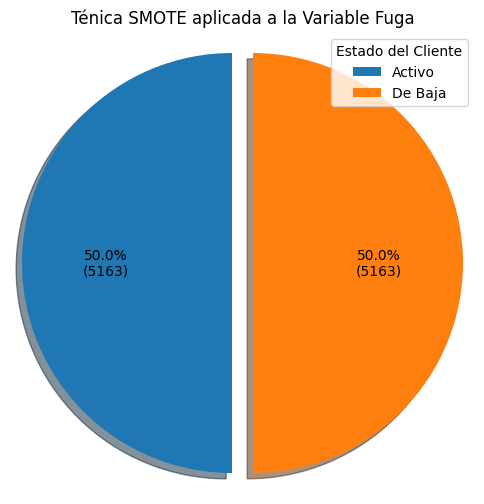

In [154]:
# Separar características (X) y variable objetivo (y)
X = datos.drop(columns=['Fuga'])
y = datos['Fuga']

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Revisar la nueva distribución
nueva_proporcion = pd.DataFrame(y_res)

fig, ax = plt.subplots(figsize=(6,6))

sizes = nueva_proporcion .value_counts(normalize=True)
explode = (0.1, 0)
counts = nueva_proporcion .value_counts()

def autopct_format(pct):
    total = sum(counts)
    val = int(round(pct*total/100.0))
    return '{:.1f}%\n({:d})'.format(pct, val)

ax.pie(sizes, explode=explode, autopct=autopct_format,
        shadow=True, startangle=90)
ax.axis('equal')

ax.legend(title='Estado del Cliente',labels=['Activo','De Baja'])
ax.set_title('Ténica SMOTE aplicada a la Variable Fuga')
plt.show()

In [155]:
# Crear el nuevo DataFrame balanceado
datos_balanceados = pd.DataFrame(X_res, columns=X.columns)
datos_balanceados['Fuga'] = y_res

datos_balanceados.shape

(10326, 27)

In [156]:
datos_balanceados

,Internet_DSL,Internet_Fibra_Optica,Internet_Sin_Servicio,Contrato_Mensual,Contrato_1_Ano,Contrato_2_Anos,Pago_Transferencia_Bancaria,Pago_Tarjeta_Credito,Pago_Cheque_Electronico,Pago_Cheque_Fisico,...,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Facturacion_Electronica,Cobro_Mensual,Cobro_Total,Fuga
0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,1.0,...,0.0,1.0,0.000000,1.000000,1.000000,0.0,1.000000,0.471144,0.066294,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,1.0,...,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.414428,0.060420,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,...,0.0,0.0,1.000000,0.000000,0.000000,0.0,1.000000,0.553731,0.030239,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,...,0.0,1.0,1.000000,0.000000,1.000000,1.0,1.000000,0.793532,0.140670,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,1.0,...,0.0,0.0,0.000000,1.000000,1.000000,0.0,1.000000,0.653234,0.028687,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,...,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.788035,0.626841,0.022694,1.0
10322,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,...,0.0,1.0,0.000000,1.000000,0.702786,1.0,1.000000,0.779525,0.035823,1.0
10323,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,...,0.0,0.0,0.000000,0.000000,1.000000,1.0,1.000000,0.767762,0.540469,1.0
10324,0.0,1.0,0.0,1.0,0.0,0.0,0.145629,0.0,0.854371,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.604275,0.160425,1.0


#🎯Correlacion y Seleccion de Variables

---



##Correlacion del total de datos

---



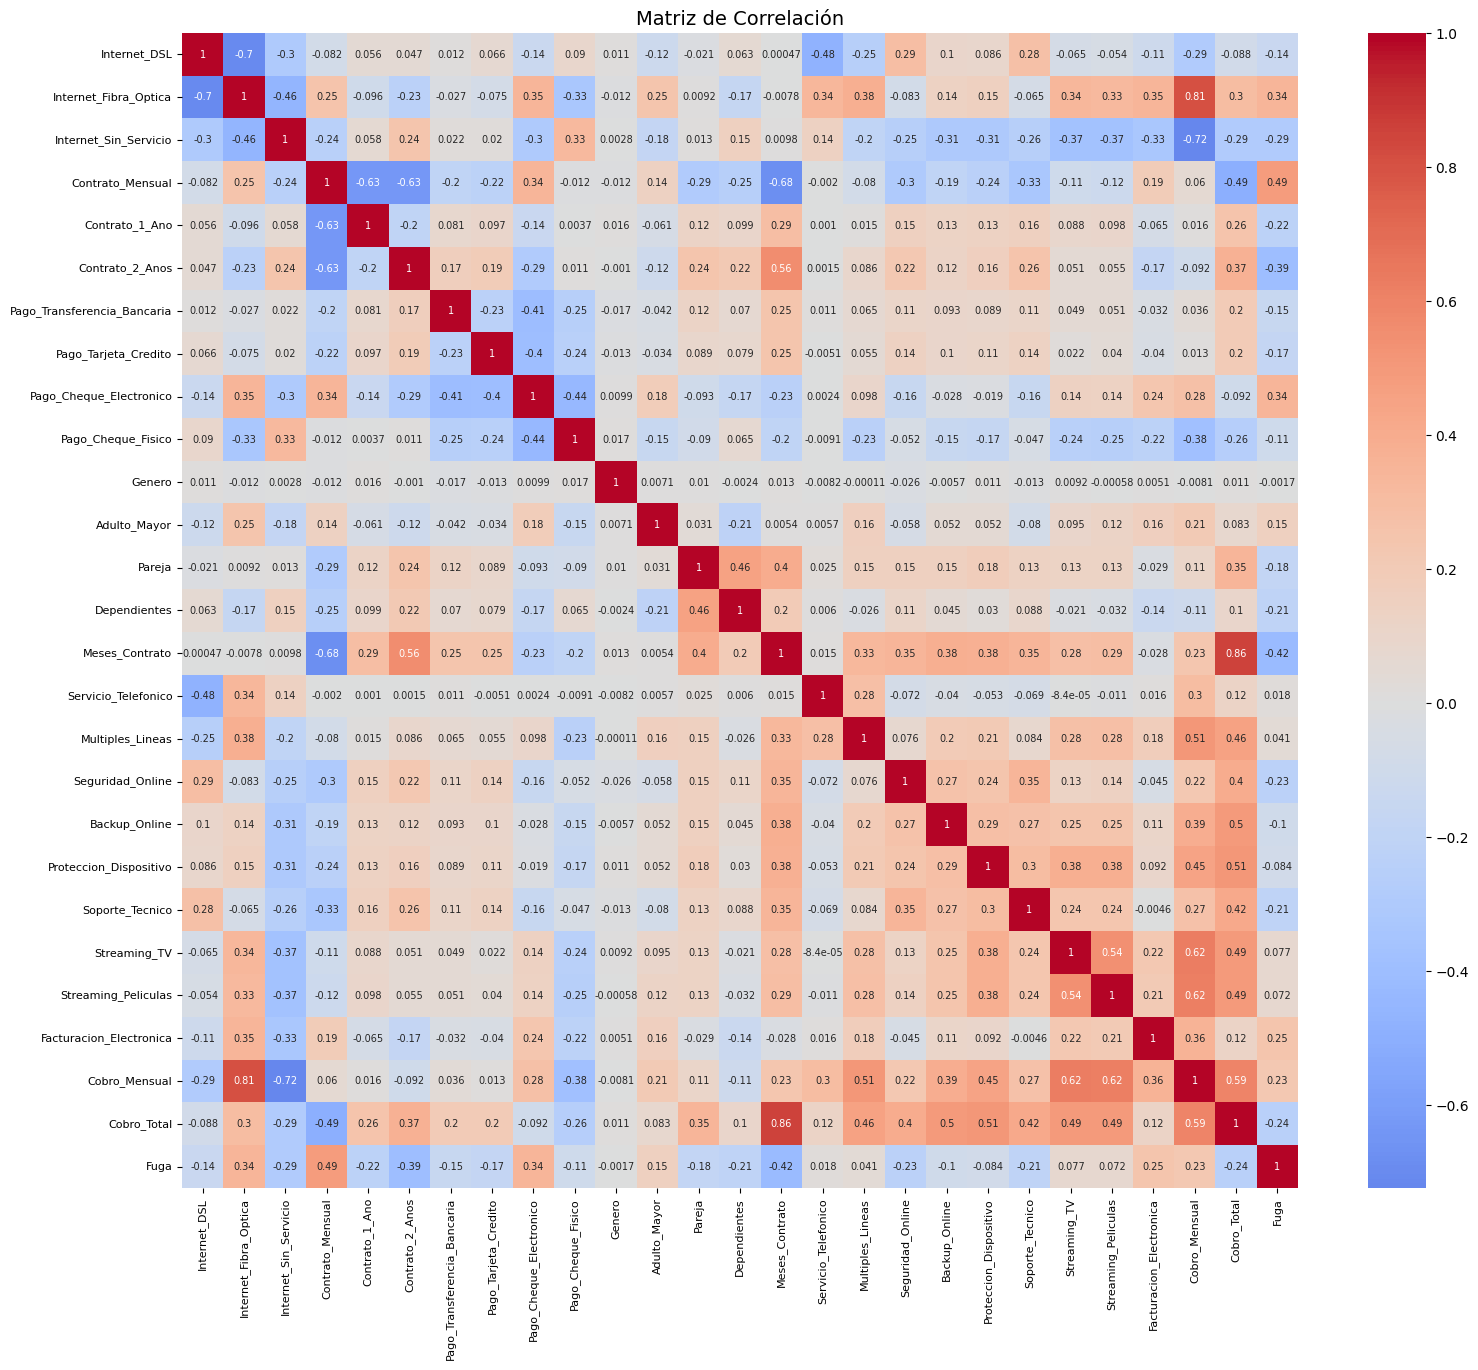


🔎 Variables más correlacionadas positivamente con Fuga:
Contrato_Mensual           0.487830
Pago_Cheque_Electronico    0.343252
Internet_Fibra_Optica      0.342771
Facturacion_Electronica    0.245508
Cobro_Mensual              0.225553
Name: Fuga, dtype: float64

🔎 Variables más correlacionadas negativamente con Fuga:
Seguridad_Online        -0.229987
Cobro_Total             -0.241024
Internet_Sin_Servicio   -0.287088
Contrato_2_Anos         -0.393943
Meses_Contrato          -0.422493
Name: Fuga, dtype: float64


In [157]:
# 1. Matriz de correlación
corr = datos_balanceados.corr(numeric_only=True)

# 2. Graficar el heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, annot_kws={"size": 7})

# Ajuste de los nombres de las variables en los ejes
plt.xticks(rotation=90, fontsize=8)  # etiquetas del eje X (columnas)
plt.yticks(rotation=0, fontsize=8)   # etiquetas del eje Y (filas)

plt.title("Matriz de Correlación", fontsize=14)
plt.show()
# 3. Correlación con la variable objetivo Fuga
corr_fuga = corr['Fuga'].drop('Fuga').sort_values(ascending=False)

print("\n🔎 Variables más correlacionadas positivamente con Fuga:")
print(corr_fuga.head(5))

print("\n🔎 Variables más correlacionadas negativamente con Fuga:")
print(corr_fuga.tail(5))


##Analisis de Variables mas Correlacionadas con Fuga

---



In [158]:
corr['Fuga'].sort_values()

,Fuga
Meses_Contrato,-0.422493
Contrato_2_Anos,-0.393943
Internet_Sin_Servicio,-0.287088
Cobro_Total,-0.241024
Seguridad_Online,-0.229987
Contrato_1_Ano,-0.221606
Dependientes,-0.210349
Soporte_Tecnico,-0.208851
Pareja,-0.182158
Pago_Tarjeta_Credito,-0.173318


In [159]:
# Correlación absoluta con Fuga
corr_fuga_abs = corr['Fuga'].drop('Fuga').abs().sort_values(ascending=False)

print("\n🔎 Variables más fuertemente correlacionadas (en valor absoluto) con Fuga:")
print(corr_fuga_abs.head(10))


🔎 Variables más fuertemente correlacionadas (en valor absoluto) con Fuga:
Contrato_Mensual           0.487830
Meses_Contrato             0.422493
Contrato_2_Anos            0.393943
Pago_Cheque_Electronico    0.343252
Internet_Fibra_Optica      0.342771
Internet_Sin_Servicio      0.287088
Facturacion_Electronica    0.245508
Cobro_Total                0.241024
Seguridad_Online           0.229987
Cobro_Mensual              0.225553
Name: Fuga, dtype: float64


In [160]:
#Elije las columnas con correlación mayor al 15% considerando los valores absolutos
lista_var_elegidas = corr_fuga_abs[corr_fuga_abs.abs()>0.15]
#Elije las columnas con correlación menor al 15% para eliminarlas de DF
lista_var_eliminar = corr_fuga_abs[corr_fuga_abs.abs()<0.15]
corr_fuga_abs = lista_var_elegidas
corr_fuga_abs.index


Index(['Contrato_Mensual', 'Meses_Contrato', 'Contrato_2_Anos',
       'Pago_Cheque_Electronico', 'Internet_Fibra_Optica',
       'Internet_Sin_Servicio', 'Facturacion_Electronica', 'Cobro_Total',
       'Seguridad_Online', 'Cobro_Mensual', 'Contrato_1_Ano', 'Dependientes',
       'Soporte_Tecnico', 'Pareja', 'Pago_Tarjeta_Credito',
       'Pago_Transferencia_Bancaria'],
      dtype='object')

##Creacion de la nueva base de datos con las variables seleccionadas

---



In [161]:
# Lista de columnas seleccionadas para el modelo
columnas_seleccionadas = [
    'Contrato_Mensual', 'Meses_Contrato', 'Contrato_2_Anos',
    'Pago_Cheque_Electronico', 'Internet_Fibra_Optica',
    'Internet_Sin_Servicio', 'Facturacion_Electronica', 'Cobro_Total',
    'Seguridad_Online', 'Cobro_Mensual', 'Contrato_1_Ano', 'Dependientes',
    'Soporte_Tecnico', 'Pareja', 'Pago_Tarjeta_Credito',
    'Pago_Transferencia_Bancaria','Fuga'
]

# Filtrar el DataFrame para que solo contenga las columnas seleccionadas
datos_modelo = datos_balanceados[columnas_seleccionadas]

# Verificar los primeros registros
datos_modelo.head()


,Contrato_Mensual,Meses_Contrato,Contrato_2_Anos,Pago_Cheque_Electronico,Internet_Fibra_Optica,Internet_Sin_Servicio,Facturacion_Electronica,Cobro_Total,Seguridad_Online,Cobro_Mensual,Contrato_1_Ano,Dependientes,Soporte_Tecnico,Pareja,Pago_Tarjeta_Credito,Pago_Transferencia_Bancaria,Fuga
0,0.0,0.112676,0.0,0.0,0.0,0.0,1.0,0.066294,0.0,0.471144,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.112676,0.0,0.0,0.0,0.0,0.0,0.060420,0.0,0.414428,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.042254,0.0,1.0,1.0,0.0,1.0,0.030239,0.0,0.553731,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.169014,0.0,1.0,1.0,0.0,1.0,0.140670,0.0,0.793532,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.028169,0.0,0.0,1.0,0.0,1.0,0.028687,0.0,0.653234,0.0,0.0,1.0,1.0,0.0,0.0,1.0


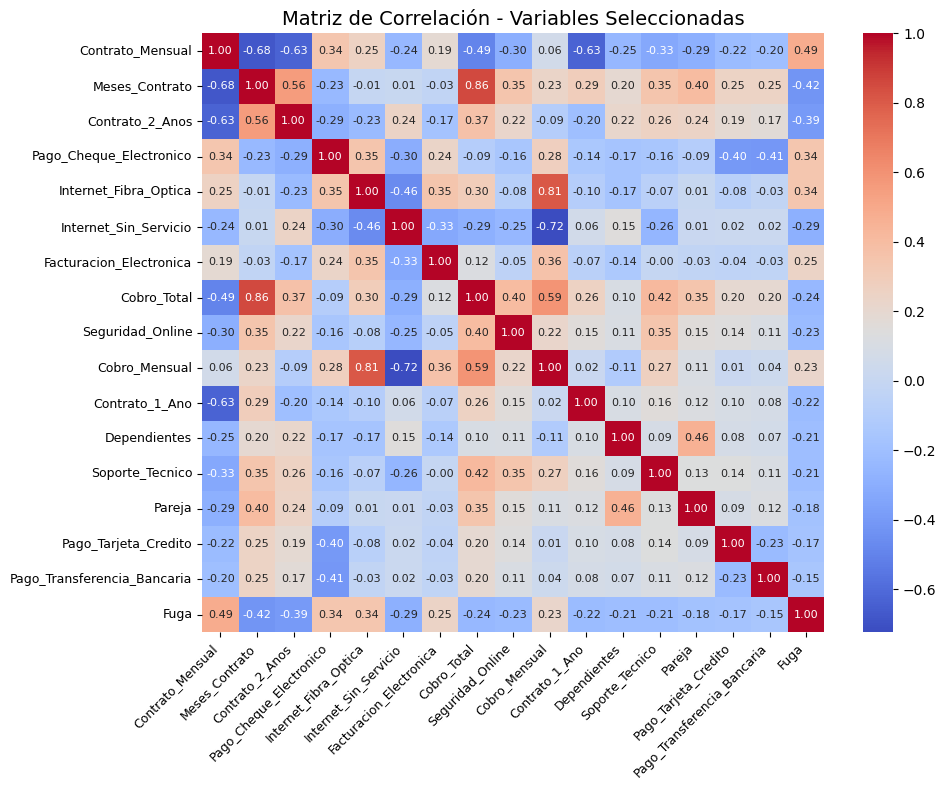

In [162]:
# Calcular la matriz de correlación
corr_modelo = datos_modelo.corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(
    corr_modelo,
    annot=True,        # muestra los valores numéricos dentro de la matriz
    fmt=".2f",         # formato de los números (2 decimales)
    cmap="coolwarm",   # paleta de colores
    cbar=True,         # muestra la barra lateral de color
    annot_kws={"size": 8} # tamaño de los números dentro de la matriz
)

plt.title("Matriz de Correlación - Variables Seleccionadas", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=9)  # etiquetas más legibles
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


#🤖 Modelado Predictivo

---



##Separación de Datos

---



###Último ajuste de las variables, análisis de Multicolineidad



In [163]:
# Definir variables independientes (todas excepto 'Fuga')
X = datos_modelo.drop(columns=['Fuga'])

# Agregar constante para el cálculo de VIF
X_const = sm.add_constant(X)

# Calcular VIF para cada variable
vif = pd.DataFrame()
vif["Variable"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]

# Eliminar la constante de la tabla de resultados
vif = vif.drop(index=0)

print("Análisis de Multicolinealidad (VIF):")
print(vif)


Análisis de Multicolinealidad (VIF):
                       Variable        VIF
1              Contrato_Mensual        inf
2                Meses_Contrato   8.635028
3               Contrato_2_Anos        inf
4       Pago_Cheque_Electronico   2.311437
5         Internet_Fibra_Optica   5.274343
6         Internet_Sin_Servicio   3.105356
7       Facturacion_Electronica   1.228288
8                   Cobro_Total  10.428678
9              Seguridad_Online   1.448909
10                Cobro_Mensual  11.495143
11               Contrato_1_Ano        inf
12                 Dependientes   1.350788
13              Soporte_Tecnico   1.570410
14                       Pareja   1.471960
15         Pago_Tarjeta_Credito   1.781240
16  Pago_Transferencia_Bancaria   1.819901


In [164]:
# Retiramos las variables que presentan altos índices de Multicolineidad
datos_modelo_mejorado = datos_modelo.drop(columns=['Cobro_Mensual','Contrato_1_Ano'])

In [165]:
# Definir variables independientes (todas excepto 'Fuga')
X = datos_modelo_mejorado.drop(columns=['Fuga'])

# Agregar constante para el cálculo de VIF
X_const = sm.add_constant(X)

# Calcular VIF para cada variable
vif = pd.DataFrame()
vif["Variable"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]

# Eliminar la constante de la tabla de resultados
vif = vif.drop(index=0)

print("Análisis de Multicolinealidad (VIF) después de eliminar Cobro_Total y Contrato_1_Ano:")
print(vif)


Análisis de Multicolinealidad (VIF) después de eliminar Cobro_Total y Contrato_1_Ano:
                       Variable       VIF
1              Contrato_Mensual  2.558107
2                Meses_Contrato  7.977280
3               Contrato_2_Anos  1.882085
4       Pago_Cheque_Electronico  2.295767
5         Internet_Fibra_Optica  2.072174
6         Internet_Sin_Servicio  2.063471
7       Facturacion_Electronica  1.224950
8                   Cobro_Total  7.908930
9              Seguridad_Online  1.426360
10                 Dependientes  1.350882
11              Soporte_Tecnico  1.485051
12                       Pareja  1.472234
13         Pago_Tarjeta_Credito  1.777414
14  Pago_Transferencia_Bancaria  1.814824


In [166]:
datos_modelo_mejorado

,Contrato_Mensual,Meses_Contrato,Contrato_2_Anos,Pago_Cheque_Electronico,Internet_Fibra_Optica,Internet_Sin_Servicio,Facturacion_Electronica,Cobro_Total,Seguridad_Online,Dependientes,Soporte_Tecnico,Pareja,Pago_Tarjeta_Credito,Pago_Transferencia_Bancaria,Fuga
0,0.0,0.112676,0.0,0.000000,0.0,0.0,1.000000,0.066294,0.0,1.0,1.000000,1.0,0.0,0.000000,0.0
1,1.0,0.112676,0.0,0.000000,0.0,0.0,0.000000,0.060420,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,1.0,0.042254,0.0,1.000000,1.0,0.0,1.000000,0.030239,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0
3,1.0,0.169014,0.0,1.000000,1.0,0.0,1.000000,0.140670,0.0,0.0,0.000000,1.0,0.0,0.000000,1.0
4,1.0,0.028169,0.0,0.000000,1.0,0.0,1.000000,0.028687,0.0,0.0,1.000000,1.0,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,1.0,0.020055,0.0,1.000000,1.0,0.0,0.788035,0.022694,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0
10322,1.0,0.032355,0.0,1.000000,1.0,0.0,1.000000,0.035823,0.0,0.0,1.000000,0.0,0.0,0.000000,1.0
10323,1.0,0.662685,0.0,1.000000,1.0,0.0,1.000000,0.540469,0.0,1.0,0.000000,1.0,0.0,0.000000,1.0
10324,1.0,0.237386,0.0,0.854371,1.0,0.0,0.000000,0.160425,0.0,0.0,0.000000,1.0,0.0,0.145629,1.0


###Separación de Datos

In [167]:

# Definir variables independientes (X) y dependiente (y)
X = datos_modelo_mejorado.drop('Fuga', axis=1)  # todas las variables menos Fuga
y = datos_modelo_mejorado['Fuga']               # variable objetivo

# Dividir en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)


Tamaño del set de entrenamiento: (7228, 14)
Tamaño del set de prueba: (3098, 14)


##Creación de Modelos

---



### Modelo Regresión Lineal

---



📊 Evaluación del Modelo - Regresión Logística

Exactitud (Accuracy): 0.7644
Precisión (Precision): 0.7433
Recall: 0.8076
F1-score: 0.7741
ROC AUC: 0.8475

Reporte de Clasificación:
              precision    recall  f1-score   support

   No se fue       0.79      0.72      0.75      1549
      Se fue       0.74      0.81      0.77      1549

    accuracy                           0.76      3098
   macro avg       0.77      0.76      0.76      3098
weighted avg       0.77      0.76      0.76      3098



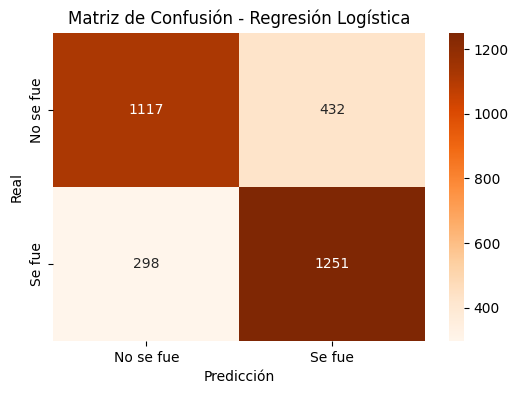

In [168]:
# ==============================
# 1. Crear y entrenar el modelo
# ==============================
lr = LogisticRegression(random_state=42, max_iter=1000)  # se aumenta max_iter por si no converge
lr.fit(X_train, y_train)

# ==============================
# 2. Realizar predicciones
# ==============================
y_pred_rl = lr.predict(X_test)           # predicción de clases (0 o 1)
y_prob_rl = lr.predict_proba(X_test)[:,1] # probabilidad de clase 1 (fuga)

# ==============================
# 3. Evaluar el modelo
# ==============================
print("📊 Evaluación del Modelo - Regresión Logística\n")
print("Exactitud (Accuracy):", round(accuracy_score(y_test, y_pred_rl), 4))
print("Precisión (Precision):", round(precision_score(y_test, y_pred_rl), 4))
print("Recall:", round(recall_score(y_test, y_pred_rl), 4))
print("F1-score:", round(f1_score(y_test, y_pred_rl), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_rl),4))
# Reporte completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rl, target_names=["No se fue", "Se fue"]))

# ==============================
# 4. Matriz de confusión
# ==============================
cm = confusion_matrix(y_test, y_pred_rl)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


###Modelo K-Nearest Neighbors (KNN)

---



📊 Evaluación del Modelo - KNN

Exactitud (Accuracy): 0.7582
Precisión (Precision): 0.7424
Recall: 0.7908
F1-score: 0.7659
ROC AUC: 0.8371

Reporte de Clasificación:
              precision    recall  f1-score   support

   No se fue       0.78      0.73      0.75      1549
      Se fue       0.74      0.79      0.77      1549

    accuracy                           0.76      3098
   macro avg       0.76      0.76      0.76      3098
weighted avg       0.76      0.76      0.76      3098



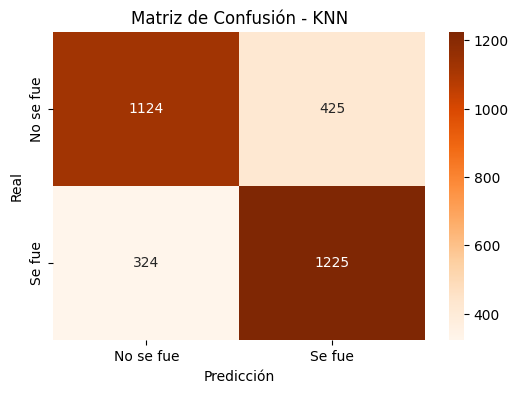

In [169]:
# ==============================
# 1. Crear y entrenar el modelo KNN
# ==============================
knn = KNeighborsClassifier(n_neighbors=5)  # puedes ajustar n_neighbors según tu dataset
knn.fit(X_train, y_train)

# ==============================
# 2. Realizar predicciones
# ==============================
y_pred_knn = knn.predict(X_test)            # predicción de clases
y_prob_knn = knn.predict_proba(X_test)[:,1] # probabilidad de clase 1 (fuga)

# ==============================
# 3. Evaluar el modelo
# ==============================
print("📊 Evaluación del Modelo - KNN\n")
print("Exactitud (Accuracy):", round(accuracy_score(y_test, y_pred_knn), 4))
print("Precisión (Precision):", round(precision_score(y_test, y_pred_knn), 4))
print("Recall:", round(recall_score(y_test, y_pred_knn), 4))
print("F1-score:", round(f1_score(y_test, y_pred_knn), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_knn),4))
# Reporte completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_knn, target_names=["No se fue", "Se fue"]))

# ==============================
# 4. Matriz de confusión
# ==============================
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN")
plt.show()


Mejor k encontrado: 1
Mejor exactitud en validación cruzada: 0.7788

📊 Evaluación del Modelo - KNN Final

Exactitud (Accuracy): 0.7747
Precisión (Precision): 0.7671
Recall: 0.7889
F1-score: 0.7778
ROC AUC: 0.7747

Reporte de Clasificación:
              precision    recall  f1-score   support

   No se fue       0.78      0.76      0.77      1549
      Se fue       0.77      0.79      0.78      1549

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098



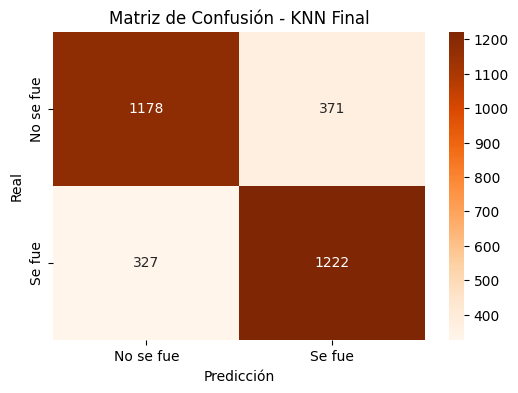

In [170]:
# ==============================
# 1. Encontrar el mejor k usando validación cruzada
# ==============================
param_grid = {'n_neighbors': list(range(1, 21))}  # probamos k de 1 a 20
knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           scoring='accuracy',  # puedes usar 'f1' si prefieres
                           cv=5,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print("Mejor k encontrado:", best_k)
print("Mejor exactitud en validación cruzada:", round(grid_search.best_score_, 4))

# ==============================
# 2. Entrenar el modelo KNN final con el mejor k
# ==============================
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

# ==============================
# 3. Realizar predicciones
# ==============================
y_pred_knn = knn_final.predict(X_test)
y_prob_knn = knn_final.predict_proba(X_test)[:,1]

# ==============================
# 4. Evaluar el modelo
# ==============================
print("\n📊 Evaluación del Modelo - KNN Final\n")
print("Exactitud (Accuracy):", round(accuracy_score(y_test, y_pred_knn), 4))
print("Precisión (Precision):", round(precision_score(y_test, y_pred_knn), 4))
print("Recall:", round(recall_score(y_test, y_pred_knn), 4))
print("F1-score:", round(f1_score(y_test, y_pred_knn), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_knn),4))
# Reporte completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_knn, target_names=["No se fue", "Se fue"]))

# ==============================
# 5. Matriz de confusión
# ==============================
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN Final")
plt.show()


### Modelo Random Forest

📊 Evaluación del Modelo - Random Forest

Exactitud (Accuracy): 0.8066
Precisión (Precision): 0.8076
Recall: 0.805
F1-score: 0.8063
ROC AUC: 0.8908

Reporte de Clasificación:
              precision    recall  f1-score   support

   No se fue       0.81      0.81      0.81      1549
      Se fue       0.81      0.81      0.81      1549

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098



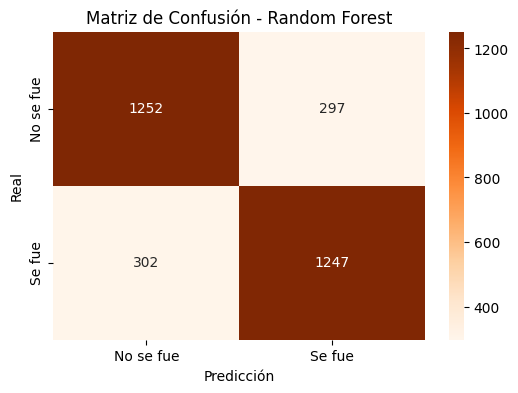

In [171]:
# ==============================
# 1. Crear y entrenar el modelo Random Forest
# ==============================
rf = RandomForestClassifier(random_state=42,
                            n_estimators=100,   # cantidad de árboles
                            max_depth=None,     # profundidad de los árboles (None = sin límite)
                            n_jobs=-1)          # usar todos los núcleos para entrenar más rápido
rf.fit(X_train, y_train)

# ==============================
# 2. Realizar predicciones
# ==============================
y_pred_rf = rf.predict(X_test)             # predicción de clases
y_prob_rf = rf.predict_proba(X_test)[:,1]  # probabilidad de clase 1 (fuga)

# ==============================
# 3. Evaluar el modelo
# ==============================
print("📊 Evaluación del Modelo - Random Forest\n")
print("Exactitud (Accuracy):", round(accuracy_score(y_test, y_pred_rf), 4))
print("Precisión (Precision):", round(precision_score(y_test, y_pred_rf), 4))
print("Recall:", round(recall_score(y_test, y_pred_rf), 4))
print("F1-score:", round(f1_score(y_test, y_pred_rf), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_rf),4))
# Reporte completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf, target_names=["No se fue", "Se fue"]))

# ==============================
# 4. Matriz de confusión
# ==============================
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()


### Modelo Árbol de Decisión

📊 Evaluación del Modelo - Árbol de Decisión

Exactitud (Accuracy): 0.7608
Precisión (Precision): 0.759
Recall: 0.7644
F1-score: 0.7617
ROC AUC: 0.7625

Reporte de Clasificación:
              precision    recall  f1-score   support

   No se fue       0.76      0.76      0.76      1549
      Se fue       0.76      0.76      0.76      1549

    accuracy                           0.76      3098
   macro avg       0.76      0.76      0.76      3098
weighted avg       0.76      0.76      0.76      3098



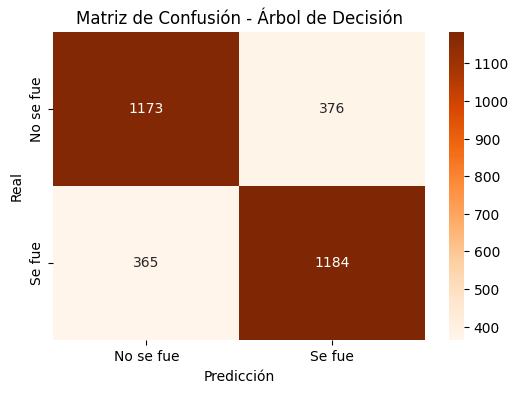

In [172]:
# ==============================
# 1. Crear y entrenar el modelo Árbol de Decisión
# ==============================
dt = DecisionTreeClassifier(random_state=42,
                            max_depth=None,      # sin límite de profundidad
                            criterion="gini")    # también puedes probar "entropy" o "log_loss"
dt.fit(X_train, y_train)

# ==============================
# 2. Realizar predicciones
# ==============================
y_pred_dt = dt.predict(X_test)             # predicción de clases
y_prob_dt = dt.predict_proba(X_test)[:,1]  # probabilidad de clase 1 (fuga)

# ==============================
# 3. Evaluar el modelo
# ==============================
print("📊 Evaluación del Modelo - Árbol de Decisión\n")
print("Exactitud (Accuracy):", round(accuracy_score(y_test, y_pred_dt), 4))
print("Precisión (Precision):", round(precision_score(y_test, y_pred_dt), 4))
print("Recall:", round(recall_score(y_test, y_pred_dt), 4))
print("F1-score:", round(f1_score(y_test, y_pred_dt), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_dt),4))
# Reporte completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_dt, target_names=["No se fue", "Se fue"]))

# ==============================
# 4. Matriz de confusión
# ==============================
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()


In [173]:
# ==============================
# 1. Definir el grid de hiperparámetros
# ==============================
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# ==============================
# 2. Crear el modelo base
# ==============================
dt = DecisionTreeClassifier(random_state=42)

# ==============================
# 3. Configurar GridSearchCV
# ==============================
grid_search_dt = GridSearchCV(estimator=dt,
                              param_grid=param_grid,
                              scoring='accuracy',  # también puedes usar 'f1'
                              cv=5,
                              n_jobs=-1,
                              verbose=1)

# ==============================
# 4. Entrenar GridSearchCV
# ==============================
grid_search_dt.fit(X_train, y_train)

# ==============================
# 5. Resultados
# ==============================
print("Mejores hiperparámetros:", grid_search_dt.best_params_)
print("Mejor exactitud en validación cruzada:", round(grid_search_dt.best_score_, 4))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mejor exactitud en validación cruzada: 0.7854


📊 Evaluación del Modelo - Árbol de Decisión

Exactitud (Accuracy): 0.775
Precisión (Precision): 0.7539
Recall: 0.8167
F1-score: 0.784
ROC AUC: 0.8544

Reporte de Clasificación:
              precision    recall  f1-score   support

   No se fue       0.80      0.73      0.77      1549
      Se fue       0.75      0.82      0.78      1549

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.77      3098
weighted avg       0.78      0.78      0.77      3098



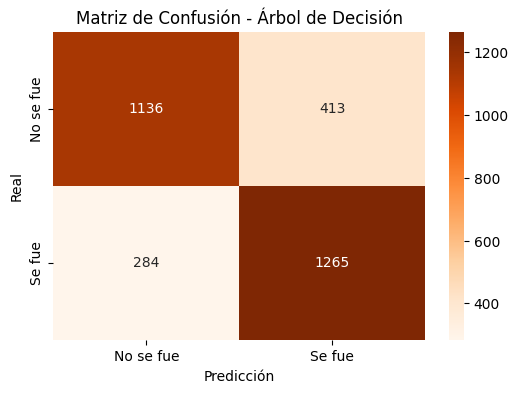

In [174]:
# ==============================
# 1. Crear y entrenar el modelo Árbol de Decisión
# ==============================
dt = DecisionTreeClassifier(random_state=42,
                            max_depth=7,      # sin límite de profundidad
                            criterion="entropy",
                             min_samples_leaf = 2,
                             min_samples_split = 2)    # también puedes probar "entropy" o "log_loss"
dt.fit(X_train, y_train)

# ==============================
# 2. Realizar predicciones
# ==============================
y_pred_dt = dt.predict(X_test)             # predicción de clases
y_prob_dt = dt.predict_proba(X_test)[:,1]  # probabilidad de clase 1 (fuga)

# ==============================
# 3. Evaluar el modelo
# ==============================
print("📊 Evaluación del Modelo - Árbol de Decisión\n")
print("Exactitud (Accuracy):", round(accuracy_score(y_test, y_pred_dt), 4))
print("Precisión (Precision):", round(precision_score(y_test, y_pred_dt), 4))
print("Recall:", round(recall_score(y_test, y_pred_dt), 4))
print("F1-score:", round(f1_score(y_test, y_pred_dt), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_dt),4))
# Reporte completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_dt, target_names=["No se fue", "Se fue"]))

# ==============================
# 4. Matriz de confusión
# ==============================
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()


###Modelo Super Vector Machine

📊 Evaluación del Modelo - SVM

Exactitud (Accuracy): 0.7802
Precisión (Precision): 0.7653
Recall: 0.8083
F1-score: 0.7862
ROC AUC: 0.8704

Reporte de Clasificación:
              precision    recall  f1-score   support

   No se fue       0.80      0.75      0.77      1549
      Se fue       0.77      0.81      0.79      1549

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098



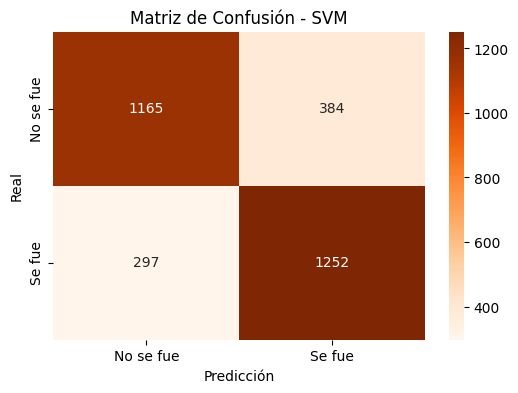

In [175]:
# ==============================
# 1. Crear y entrenar el modelo SVM
# ==============================
svm_model = SVC(kernel="rbf",        # "linear", "poly", "rbf", "sigmoid"
                probability=True,    # necesario para obtener predict_proba
                random_state=42)
svm_model.fit(X_train, y_train)

# ==============================
# 2. Realizar predicciones
# ==============================
y_pred_svm = svm_model.predict(X_test)             # predicción de clases
y_prob_svm = svm_model.predict_proba(X_test)[:,1]  # probabilidad de clase 1 (fuga)

# ==============================
# 3. Evaluar el modelo
# ==============================
print("📊 Evaluación del Modelo - SVM\n")
print("Exactitud (Accuracy):", round(accuracy_score(y_test, y_pred_svm), 4))
print("Precisión (Precision):", round(precision_score(y_test, y_pred_svm), 4))
print("Recall:", round(recall_score(y_test, y_pred_svm), 4))
print("F1-score:", round(f1_score(y_test, y_pred_svm), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_svm),4))
# Reporte completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_svm, target_names=["No se fue", "Se fue"]))

# ==============================
# 4. Matriz de confusión
# ==============================
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVM")
plt.show()


##Evaluación de Modelos

In [176]:
# ==============================
# 1. Calcular métricas de cada modelo
# ==============================
resultados = {
    "Regresión Logística": {
        "Exactitud": accuracy_score(y_test, y_pred_rl),
        "Precisión": precision_score(y_test, y_pred_rl),
        "Recall": recall_score(y_test, y_pred_rl),
        "F1-score": f1_score(y_test, y_pred_rl),
        "ROC AUC": roc_auc_score(y_test, y_prob_rl)

    },
    "KNN": {
        "Exactitud": accuracy_score(y_test, y_pred_knn),
        "Precisión": precision_score(y_test, y_pred_knn),
        "Recall": recall_score(y_test, y_pred_knn),
        "F1-score": f1_score(y_test, y_pred_knn),
        "ROC AUC": roc_auc_score(y_test, y_prob_knn)

    },
    "Random Forest": {
        "Exactitud": accuracy_score(y_test, y_pred_rf),
        "Precisión": precision_score(y_test, y_pred_rf),
        "Recall": recall_score(y_test, y_pred_rf),
        "F1-score": f1_score(y_test, y_pred_rf),
        "ROC AUC": roc_auc_score(y_test, y_prob_rf)

    },
    "Árbol de Decisión": {
        "Exactitud": accuracy_score(y_test, y_pred_dt),
        "Precisión": precision_score(y_test, y_pred_dt),
        "Recall": recall_score(y_test, y_pred_dt),
        "F1-score": f1_score(y_test, y_pred_dt),
        "ROC AUC": roc_auc_score(y_test, y_prob_dt)

    },
    "SVM": {
        "Exactitud": accuracy_score(y_test, y_pred_svm),
        "Precisión": precision_score(y_test, y_pred_svm),
        "Recall": recall_score(y_test, y_pred_svm),
        "F1-score": f1_score(y_test, y_pred_svm),
        "ROC AUC": roc_auc_score(y_test, y_prob_svm)

    }
}

# ==============================
# 2. Convertir en DataFrame
# ==============================
df_resultados = pd.DataFrame(resultados).T  # Transponer para que los modelos queden como índice

# Justificación de la elección del modelo
justificacion = """
 Justificación de la elección del modelo:

Se elige Random Forest como el modelo predictivo principal porque combina
alta precisión, buen Recall,  mejor F1-score y el mejor ROC AUC, lo que
implica que el modelo distingue bien a los que se fugan. Estos indicadores
logran un balance ideal entre identificar a los clientes que se
 dan de baja y evitar errores en las predicciones.

Además, su capacidad de interpretar las variables más relevantes lo convierte en
la mejor herramienta para explicar el fenómeno de fuga y orientar decisiones estratégicas.
"""
display(df_resultados)
print(justificacion)


,Exactitud,Precisión,Recall,F1-score,ROC AUC
Regresión Logística,0.764364,0.743316,0.807618,0.774134,0.847544
KNN,0.774693,0.767106,0.788896,0.777849,0.774693
Random Forest,0.806649,0.807642,0.805036,0.806337,0.890793
Árbol de Decisión,0.775016,0.753874,0.816656,0.784010,0.854398
SVM,0.780181,0.765281,0.808263,0.786185,0.870405



 Justificación de la elección del modelo:

Se elige Random Forest como el modelo predictivo principal porque combina
alta precisión, buen Recall,  mejor F1-score y el mejor ROC AUC, lo que 
implica que el modelo distingue bien a los que se fugan. Estos indicadores
logran un balance ideal entre identificar a los clientes que se
 dan de baja y evitar errores en las predicciones.

Además, su capacidad de interpretar las variables más relevantes lo convierte en
la mejor herramienta para explicar el fenómeno de fuga y orientar decisiones estratégicas.



#📋Interpretación y Conclusiones

##Análisis de la Importancia de las Variables

📊 Importancia de Variables en Random Forest

                       Variable  Importancia
7                   Cobro_Total     0.269858
1                Meses_Contrato     0.226874
0              Contrato_Mensual     0.126865
4         Internet_Fibra_Optica     0.052650
3       Pago_Cheque_Electronico     0.044931
2               Contrato_2_Anos     0.041026
8              Seguridad_Online     0.039374
6       Facturacion_Electronica     0.038974
10              Soporte_Tecnico     0.037551
9                  Dependientes     0.031639
11                       Pareja     0.031305
5         Internet_Sin_Servicio     0.027243
12         Pago_Tarjeta_Credito     0.016447
13  Pago_Transferencia_Bancaria     0.015265


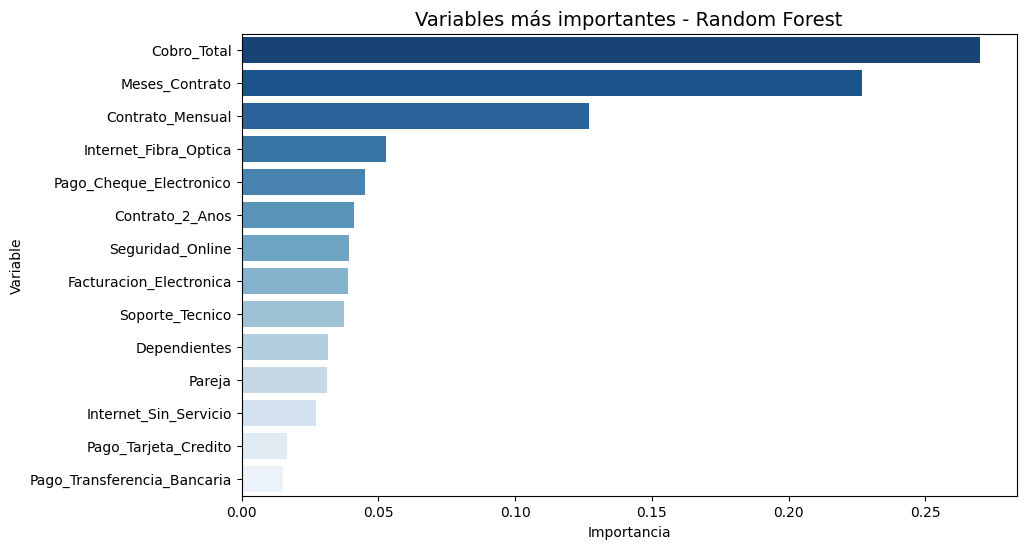

In [177]:
# =======================================
# Análisis de Importancia de Variables
# Modelo: Random Forest
# =======================================

# Extraer importancia de variables
importances = rf.feature_importances_
feature_names = X_train.columns

# Crear DataFrame ordenado
feature_importances = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Mostrar tabla
print("📊 Importancia de Variables en Random Forest\n")
print(feature_importances)

# Visualización con gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='Importancia', y='Variable', data=feature_importances.head(15), palette="Blues_r")
plt.title("Variables más importantes - Random Forest", fontsize=14)
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()


##Conclusiones

# Análisis de Fuga de Clientes - Random Forest

En base a los resultados del modelo Random Forest, se identifican los factores más relevantes que afectan la **fuga de clientes** en la compañía de telefonía.

---

## 1️⃣ Factores clave que aumentan el abandono

Variables con mayor importancia que incrementan la probabilidad de fuga:

| Variable             | Importancia | Interpretación |
|---------------------|------------|----------------|
| Cobro_Total          | 0.27       | Clientes con **mayores cobros totales** podrían sentirse insatisfechos o sobrecargados, aumentando la fuga. |
| Meses_Contrato       | 0.23       | Los clientes con **contratos más cortos** tienden a abandonar más rápido. Los contratos largos suelen fidelizar. |
| Contrato_Mensual     | 0.13       | Los que tienen **contratos mensuales** (sin compromiso) son más propensos a irse porque tienen libertad de cambiar de proveedor. |

> Estas tres variables concentran casi el 65% de la importancia total, indicando que **precio y tipo de contrato** son los principales drivers de fuga.

---

## 2️⃣ Factores que disminuyen el abandono

Variables que tienden a **fidelizar o retener clientes**:

| Variable                     | Importancia | Interpretación |
|-------------------------------|------------|----------------|
| Internet_Fibra_Optica         | 0.053      | Clientes con **internet de fibra óptica** tienen menor propensión a irse; valoran la calidad del servicio. |
| Pago_Cheque_Electronico       | 0.044      | Clientes que usan **pagos electrónicos** tienen más comodidad y satisfacción. |
| Facturacion_Electronica       | 0.039      | Facilita la experiencia de facturación digital y retención. |
| Soporte_Tecnico               | 0.038      | Un **buen soporte técnico** contribuye a la retención. |
| Seguridad_Online              | 0.039      | Clientes que perciben **servicios de seguridad online** se sienten más protegidos y fieles. |
| Dependientes / Pareja         | 0.031      | Clientes con **familiares a cargo** pueden ser más estables, buscando continuidad del servicio. |

---

## 3️⃣ Estrategias de Retención de Clientes

### A) Ajuste de precios y contratos
- Revisar `Cobro_Total` y ofrecer **planes más competitivos**.  
- Incentivar **contratos de largo plazo** con beneficios exclusivos.  
- Dar **flexibilidad en contratos mensuales** con recompensas por continuidad.

### B) Mejorar la experiencia de servicios clave
- Promocionar **Internet de Fibra Óptica**, **seguridad online** y servicios digitales.  
- Optimizar **soporte técnico**: tiempos de respuesta rápidos y atención personalizada.  
- Facilitar métodos de pago electrónico y facturación digital.

### C) Estrategias de fidelización
- Programas de lealtad para clientes con **familiares a cargo**.  
- Bonificaciones o descuentos para clientes que **renuevan contrato**.  
- Enviar **alertas o recordatorios personalizados** para pagos y actualizaciones de servicios.

### D) Segmentación y alertas tempranas
- Identificar clientes con **contratos cortos y cobros altos**, los más propensos a fugarse.  
- Aplicar **campañas personalizadas de retención** antes de que finalice su contrato mensual o se incremente el cobro.

---

✅ **Resumen Ejecutivo**

El abandono se concentra principalmente en **clientes con contratos cortos o mensuales y altos cobros**.  
Mejorando la **calidad del servicio, la experiencia digital y los incentivos de fidelización**, se puede reducir significativamente la fuga de clientes.
